### Student Information
Name: 雲聿加

Student ID: 112034609

GitHub ID:JuliaYunn

Kaggle name:JJJJJ

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# Part 1.

In [2]:
import pandas as pd

# Training data
anger_train = pd.read_csv(r"C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\data\semeval\train\anger-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

sadness_train = pd.read_csv(r"C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\data\semeval\train\sadness-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

fear_train = pd.read_csv(r"C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\data\semeval\train\fear-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

joy_train = pd.read_csv(r"C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\data\semeval\train\joy-ratings-0to1.train.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [3]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [7]:
train_df

,id,text,emotion,intensity
1366,20509,i've been rooting for him since the beginning ...,fear,0.521
2527,30523,I might not pay for my own health insurance bu...,joy,0.417
2210,30206,"He showed us a really lively performance, with...",joy,0.646
1029,20172,@BBCNews 😝 scared of their own horror story th...,fear,0.708
3581,40754,Free live music in DC tonight! #blues with #M...,sadness,0.188
...,...,...,...,...
1584,20727,"Don't forget 2 test yr #smoke #alarm, #carbon ...",fear,0.417
2910,40083,@KingJames @chrisbosh\n To good hearts I lost ...,sadness,0.750
2377,30373,Watch this amazing live.ly broadcast by @hunte...,joy,0.519
2654,30650,@niceoneWern @Alotta_Pain the gleesome threesome,joy,0.320


In [5]:
### testing data
anger_test = pd.read_csv(r"C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\data\semeval\dev\anger-ratings-0to1.dev.gold.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

sadness_test = pd.read_csv(r"C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\data\semeval\dev\sadness-ratings-0to1.dev.gold.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

fear_test = pd.read_csv(r"C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\data\semeval\dev\fear-ratings-0to1.dev.gold.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

joy_test = pd.read_csv(r"C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\data\semeval\dev\joy-ratings-0to1.dev.gold.txt", sep="\t", header=None, names=["id", "text", "emotion", "intensity"])


# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896
...,...,...,...,...
3608,40781,@VivienLloyd Thank you so much! Just home - st...,sadness,0.104
3609,40782,Just put the winter duvet on ☃️❄️🌬☔️,sadness,0.104
3610,40783,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness,0.088
3611,40784,@BluesfestByron second artist announcement loo...,sadness,0.083


In [8]:
# shuffle dataset
train_df = train_df.sample(frac=1) #如 frac=0.6 會隨機選取 60 percent data 
test_df = test_df.sample(frac=1)

In [9]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


# Exercise 1

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leanlab908-4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

C:\Users\Leanlab908-4\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


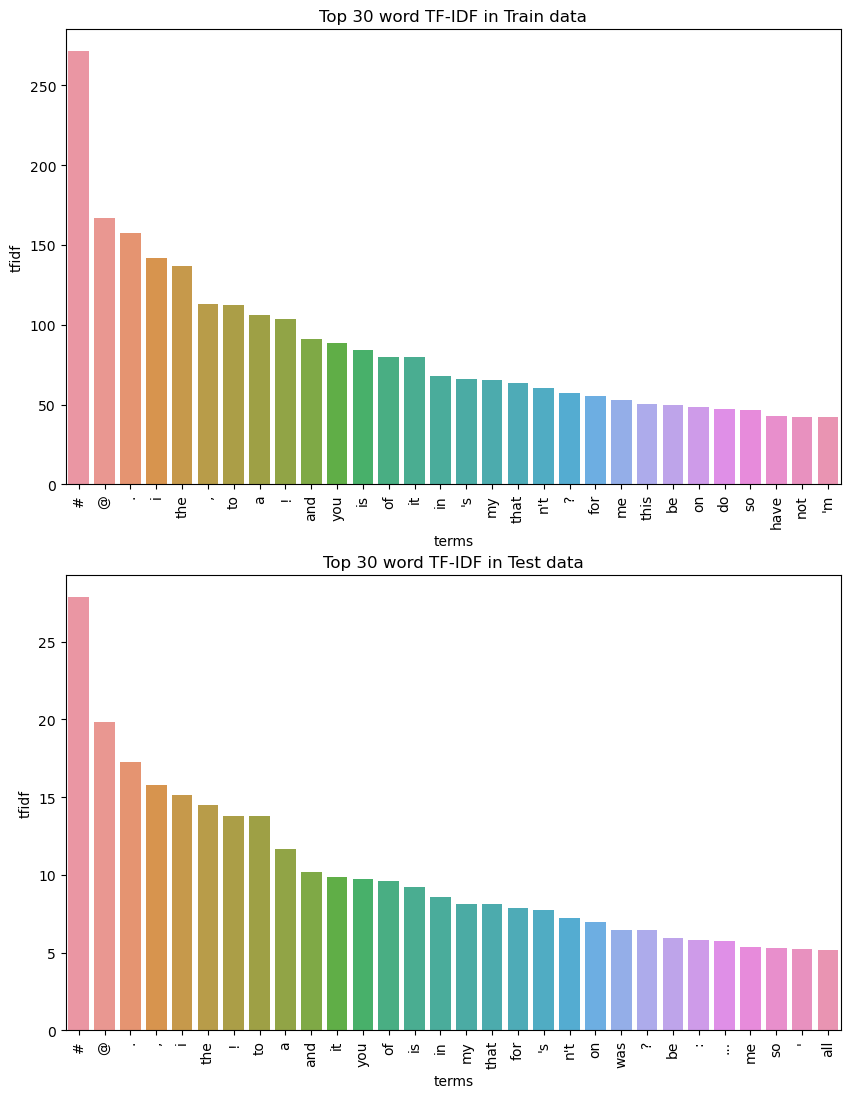

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#tfidf 設定 and transform
tfidf_vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize)
tfidf_vectorizer.fit(train_df['text'])

# Extract TF-IDF features
train_data_tfidf_features = tfidf_vectorizer.transform(train_df['text'])
test_data_tfidf_features = tfidf_vectorizer.transform(test_df['text'])

# get the features name
feature_names_tfidf = tfidf_vectorizer.get_feature_names_out()

# Plot the top 30 words based on TF-IDF
train_tfidf_sum = np.asarray(train_data_tfidf_features.sum(axis=0)).ravel()
df_train_tfidf = pd.DataFrame(zip(train_tfidf_sum, feature_names_tfidf), columns=['tfidf', 'terms'])
df_train_tfidf = df_train_tfidf.sort_values('tfidf', ascending=False)[:30]

test_tfidf_sum = np.asarray(test_data_tfidf_features.sum(axis=0)).ravel()
df_test_tfidf = pd.DataFrame(zip(test_tfidf_sum, feature_names_tfidf), columns=['tfidf', 'terms'])
df_test_tfidf = df_test_tfidf.sort_values('tfidf', ascending=False)[:30]

fig, axs = plt.subplots(2, 1, figsize=(10, 13))
axs[0].set_title('Top 30 word TF-IDF in Train data')
axs[1].set_title('Top 30 word TF-IDF in Test data')

g_1 = sns.barplot(x=df_train_tfidf['terms'], y=df_train_tfidf['tfidf'], ax=axs[0])
g_1.set_xticklabels(df_train_tfidf['terms'], rotation=90)
g_2 = sns.barplot(x=df_test_tfidf['terms'], y=df_test_tfidf['tfidf'], ax=axs[1])
g_2.set_xticklabels(df_test_tfidf['terms'], rotation=90)

plt.show()

------------------------------------------------------------------------

In [15]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [16]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

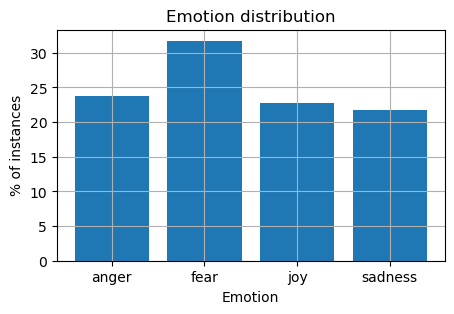

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [20]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [21]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [22]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [23]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [25]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

# Import NLTK and download resources
import nltk
nltk.download('punkt')

# Initialize tokenizer
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# Fit the tokenizer on your data
BOW_500.fit(train_df['text'])

# Transform the data
train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

# Check dimension
print(train_data_BOW_features_500.shape)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leanlab908-4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Leanlab908-4\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)


In [27]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

# Exercise 2

In [29]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer with 1000 features
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Fit and transform 
tfidf_matrix = tfidf_vectorizer.fit_transform(train_df['text'])

# Get the feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display [100:110]
print("[100:110]:")
print(feature_names[100:111])

[100:110]:
['bitter' 'black' 'blacks' 'blame' 'blessed' 'blood' 'bloody' 'blues'
 'body' 'boiling' 'book']


------------------------------------------------------------------------------

In [30]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [31]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'fear', 'fear', 'anger', 'sadness', 'anger', 'joy',
       'sadness', 'fear', 'fear'], dtype=object)

In [32]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.99
testing accuracy: 0.68


In [33]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [34]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_train, y_pred=y_train_pred))

              precision    recall  f1-score   support

       anger       0.97      1.00      0.98       857
        fear       0.98      1.00      0.99      1147
         joy       1.00      1.00      1.00       823
     sadness       1.00      0.94      0.97       786

    accuracy                           0.99      3613
   macro avg       0.99      0.98      0.99      3613
weighted avg       0.99      0.99      0.99      3613



In [35]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 

In [36]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

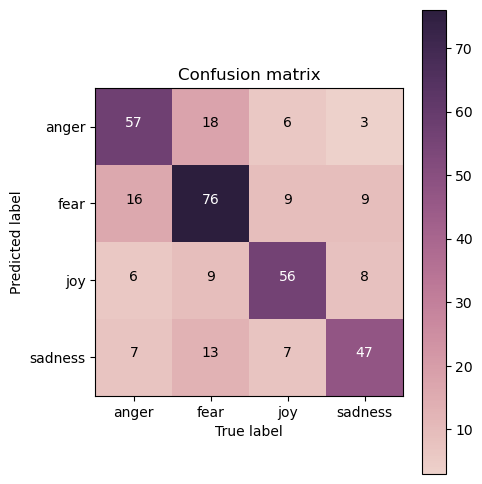

In [37]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

# Exercise 3

Can you interpret the results above? What do they mean?

# Answer here
The diagonal line means the right prediction. Based on the frequency of right prediction we can know that fear is more easily to be identified.The evaluation indicator, Precision, means the accuracy among predicted as 'positive'. Which means joy owns the highest accuracy when the prediction is postive. And sadness tends to predict as fear.

# Exercise 4

In [38]:
# Answer here
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [39]:
# Answer here
#miltinomialNB is design for discrete  data (Text classification)
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

y_train_pred_NB = model.predict(X_train)

y_test_pred_NB = model.predict(X_test)

In [40]:
## precision, recall, f1-score for train data
from sklearn.metrics import classification_report

print(classification_report(y_true=y_train, y_pred=y_train_pred_NB))

              precision    recall  f1-score   support

       anger       0.77      0.80      0.78       857
        fear       0.78      0.81      0.79      1147
         joy       0.87      0.80      0.83       823
     sadness       0.76      0.75      0.76       786

    accuracy                           0.79      3613
   macro avg       0.79      0.79      0.79      3613
weighted avg       0.79      0.79      0.79      3613



In [43]:
## precision, recall, f1-score for test data
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



# Exercise 5

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here
We can examine the general prediction result from the two models. The value through the four evaluation indicators, which are precision, recall, accuracy and f1-score, naive bayes provides a higher score overall. Which means that we can seem naive bayes as a better-performing model.

I also find there's a significant difference in the f1 score of train and test data in Decision Tree. The test data owns a lower score. However, the f1-score in Naive Bayes between train and test isvery balanced. We can know that there might be a problem of underfitting on Decision Tree model.Since the model is too simple.

To improve the model performance, we can try to upply hyperparameter to underfitting model. And for Naive Bayes, we can try to use feature engineering.

 ---------------------------------------------------------------------------------------

In [44]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)


X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [45]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2098        joy
2957    sadness
1102       fear
905        fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [46]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [47]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
 softmax (Softmax)           (None, 4)                 0   

In [48]:
import os
from keras.callbacks import CSVLogger
# Ensure the 'logs' directory exists
os.makedirs('logs', exist_ok=True)

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


113/113 [==============================] - 2s 4ms/step - loss: 1.3339 - accuracy: 0.3460 - val_loss: 1.2884 - val_accuracy: 0.4179
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 1.0132 - accuracy: 0.6347 - val_loss: 0.9612 - val_accuracy: 0.6369
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.7833 - val_loss: 0.7821 - val_accuracy: 0.6945
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.8406 - val_loss: 0.7817 - val_accuracy: 0.7089
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.8782 - val_loss: 0.8132 - val_accuracy: 0.6888
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.9012 - val_loss: 0.8605 - val_accuracy: 0.6830
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9258 - val_loss: 0.9147 - val_accuracy: 0.6686
Epoc

In [49]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 2ms/step


array([[5.3764642e-03, 9.8512888e-01, 6.8009052e-05, 9.4266068e-03],
       [1.8890757e-03, 9.0288979e-01, 9.5003240e-02, 2.1790636e-04],
       [1.6736066e-02, 9.8236775e-01, 4.9861434e-12, 8.9625630e-04],
       [8.8652366e-01, 9.9267900e-06, 1.1334567e-01, 1.2064598e-04],
       [8.7554461e-01, 2.3660468e-02, 5.5316230e-04, 1.0024172e-01]],
      dtype=float32)

In [50]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'fear', 'anger', 'anger'], dtype=object)

In [51]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [52]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.345973,1.333940,0.417867,1.288418
1,1,0.634653,1.013231,0.636888,0.961228
2,2,0.783283,0.596432,0.694524,0.782127
3,3,0.840576,0.425963,0.708934,0.781717
4,4,0.878218,0.337826,0.688761,0.813239
5,5,0.901190,0.275459,0.682997,0.860549
6,6,0.925823,0.223816,0.668588,0.914705
7,7,0.938555,0.189113,0.674352,0.939363
8,8,0.951564,0.155032,0.688761,1.011985
9,9,0.958760,0.141095,0.674352,1.049792


# Exercise 6

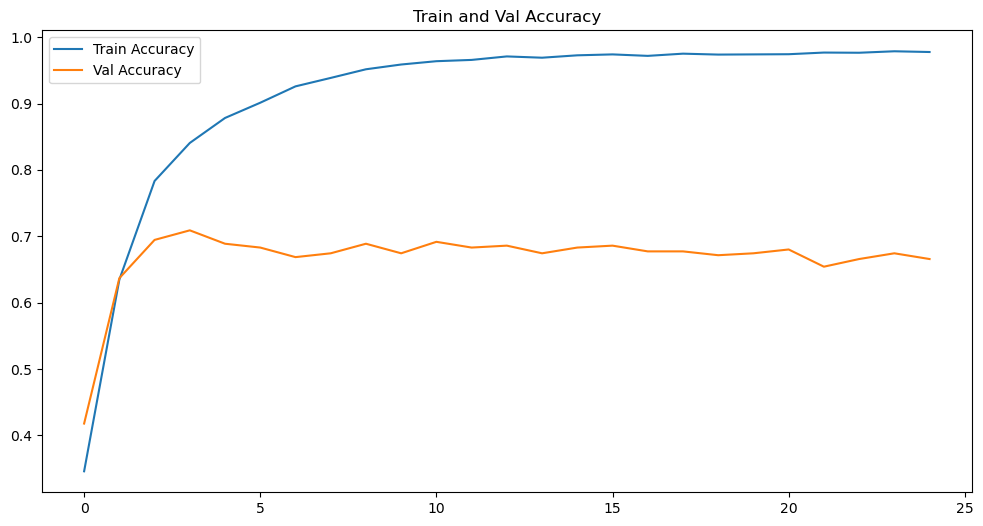

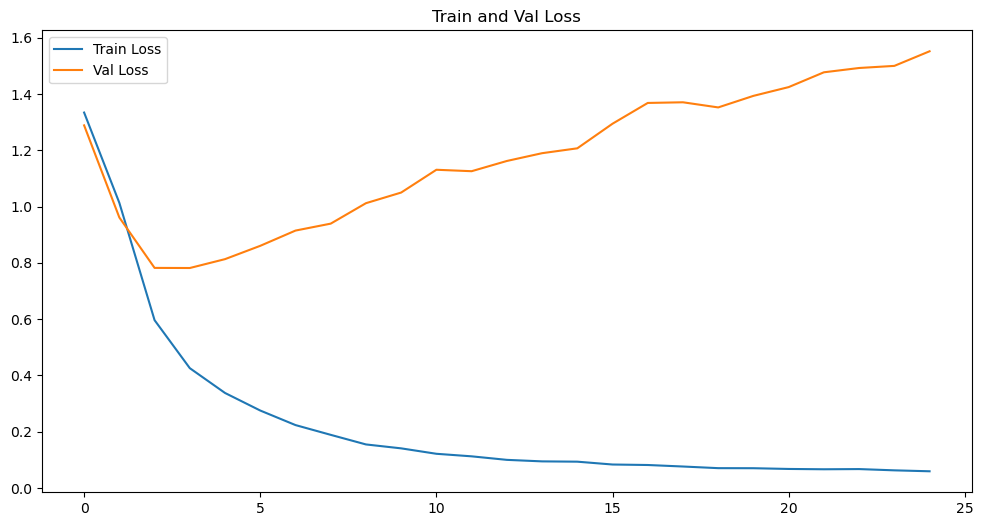

In [53]:
# Answer here

import matplotlib.pyplot as plt
# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val Accuracy')
plt.title('Train and Val Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(training_log['epoch'], training_log['loss'], label='Train Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val Loss')
plt.title('Train and Val Loss')

plt.legend()
plt.show()

# 7.Word2Vec

In [54]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2098,30094,@Jen_Lee @mostlymartha @edotwoods we just foun...,"[@, Jen_Lee, @, mostlymartha, @, edotwoods, we..."
2957,40130,When will the weeks full of Mondays end?? #dis...,"[When, will, the, weeks, full, of, Mondays, en..."
1102,20245,Tired of people pretending Islam isn't one of ...,"[Tired, of, people, pretending, Islam, is, n't..."
905,20048,i had a hard time falling a sleep and woke up ...,"[i, had, a, hard, time, falling, a, sleep, and..."
871,20014,Job interview in the afternoon #nervous #ek,"[Job, interview, in, the, afternoon, #, nervou..."


In [55]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'Jen_Lee', '@', 'mostlymartha', '@', 'edotwoods', 'we', 'just', 'found', 'thin', 'mints', 'in', 'a', 'freezer', 'clean', '.', 'i', 'could', "n't", 'be', 'more', 'elated', '.']),
       list(['When', 'will', 'the', 'weeks', 'full', 'of', 'Mondays', 'end', '?', '?', '#', 'disheartened']),
       list(['Tired', 'of', 'people', 'pretending', 'Islam', 'is', "n't", 'one', 'of', 'the', 'most', 'misogynistic', 'religions', ',', 'it', "'s", 'no', 'coincidence', 'Muslim', 'countries', 'are', 'terrible', 'for', 'women', '.'])],
      dtype=object)

In [56]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [57]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.6255772 ,  0.33118626, -0.14508353, -0.06231751, -0.26545203,
       -1.1876785 ,  0.80591995,  1.031224  , -0.15519781, -0.56378233,
       -0.44069648, -0.36055982, -0.6369553 ,  0.35828033, -0.26794878,
       -0.6547379 ,  0.09060956, -0.5793187 ,  0.03359439, -1.0182006 ,
        0.62534237,  0.98960626,  0.60346067, -0.07770739,  0.44555745,
        0.18251953, -0.69470346,  0.55009484, -0.8229265 ,  0.24064367,
        0.46377805, -0.29709673,  0.31116065, -0.69057125, -0.20574886,
        0.3686532 ,  0.21369971, -0.21817037, -0.78385305, -0.39503637,
       -0.08608182, -0.10210519, -0.5755507 ,  0.03634654,  0.7153466 ,
       -0.06272119, -0.7583343 ,  0.44758072,  0.60192126,  0.7252719 ,
        0.25420606, -0.65668803, -0.0511297 ,  0.01557973, -0.6792049 ,
       -0.16900317,  0.5473512 ,  0.09288638,  0.34363794,  0.3846885 ,
        0.08629899, -0.1538863 ,  0.947999  ,  0.18934602, -0.48914796,
        0.7388984 ,  0.37914437,  0.55041015, -1.2457879 ,  0.39

In [58]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9183629155158997),
 ('Be', 0.9181938171386719),
 ('free', 0.9040911197662354),
 ('Sipping', 0.8991398811340332),
 ('help', 0.8985776305198669),
 ('suffer', 0.8974496126174927),
 ('plz', 0.8965185284614563),
 ('.\\nA', 0.8958934545516968),
 ('PUSSY\\nP', 0.8911178112030029),
 ('Online', 0.8907107710838318)]

In [59]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = r"C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [60]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.917618453502655),
 ('miss', 0.9164499640464783),
 ('hello', 0.9158352017402649),
 ('thanks', 0.9150084853172302),
 ('merry', 0.9053248167037964),
 ('bless', 0.902732253074646),
 ('wish', 0.9013165235519409)]

# Exercise 7

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

# Answer here
1. We can use the technique of average pooling. Which means we can calculate the average of f all the word vectors. Then it will came up with a sentence vector that contains the average vector value and we can then change it back to the semantic meaning. 
2. We can use the technique of TF-IDF weighted average pooling. It is similar as the average pooling. But the score here is weighted by tfidf.

In [66]:
train_df

,id,text,emotion,intensity,text_tokenized
2098,30094,@Jen_Lee @mostlymartha @edotwoods we just foun...,joy,0.760,"[@, Jen_Lee, @, mostlymartha, @, edotwoods, we..."
2957,40130,When will the weeks full of Mondays end?? #dis...,sadness,0.688,"[When, will, the, weeks, full, of, Mondays, en..."
1102,20245,Tired of people pretending Islam isn't one of ...,fear,0.660,"[Tired, of, people, pretending, Islam, is, n't..."
905,20048,i had a hard time falling a sleep and woke up ...,fear,0.854,"[i, had, a, hard, time, falling, a, sleep, and..."
871,20014,Job interview in the afternoon #nervous #ek,fear,0.917,"[Job, interview, in, the, afternoon, #, nervou..."
...,...,...,...,...,...
3080,40253,@V_of_Europe @ckolacia MSM relentlessly saying...,sadness,0.604,"[@, V_of_Europe, @, ckolacia, MSM, relentlessl..."
3595,40768,"Nice to see Balotelli back to his best, good p...",sadness,0.167,"[Nice, to, see, Balotelli, back, to, his, best..."
2257,30253,@_stfukohle it's ok champ you'll make it I'm c...,joy,0.600,"[@, _stfukohle, it, 's, ok, champ, you, 'll, m..."
3491,40664,@markoheight @Cassie_OB we sound like vampires...,sadness,0.292,"[@, markoheight, @, Cassie_OB, we, sound, like..."


In [69]:
import numpy as np

def average_word_vectors(tokens, word2vec_model):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    if not vectors:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(vectors, axis=0)

train_df['sentence_vector'] = train_df['text_tokenized'].apply(lambda x: average_word_vectors(x, word2vec_model))

In [70]:
train_df

,id,text,emotion,intensity,text_tokenized,sentence_vector
2098,30094,@Jen_Lee @mostlymartha @edotwoods we just foun...,joy,0.760,"[@, Jen_Lee, @, mostlymartha, @, edotwoods, we...","[0.05348327, 0.3039139, 0.12189055, -0.1710699..."
2957,40130,When will the weeks full of Mondays end?? #dis...,sadness,0.688,"[When, will, the, weeks, full, of, Mondays, en...","[0.15162703, 0.69049764, -0.076200865, 0.46598..."
1102,20245,Tired of people pretending Islam isn't one of ...,fear,0.660,"[Tired, of, people, pretending, Islam, is, n't...","[0.034455128, 0.6352924, 0.027912015, -0.01921..."
905,20048,i had a hard time falling a sleep and woke up ...,fear,0.854,"[i, had, a, hard, time, falling, a, sleep, and...","[0.12926076, 0.5484394, -0.0026181592, -0.2185..."
871,20014,Job interview in the afternoon #nervous #ek,fear,0.917,"[Job, interview, in, the, afternoon, #, nervou...","[-0.09017346, 0.2665288, -0.22144689, 0.494549..."
...,...,...,...,...,...,...
3080,40253,@V_of_Europe @ckolacia MSM relentlessly saying...,sadness,0.604,"[@, V_of_Europe, @, ckolacia, MSM, relentlessl...","[0.020418303, 0.01727962, -0.3209342, -0.13769..."
3595,40768,"Nice to see Balotelli back to his best, good p...",sadness,0.167,"[Nice, to, see, Balotelli, back, to, his, best...","[0.14848681, 0.56286734, -0.054023616, -0.0558..."
2257,30253,@_stfukohle it's ok champ you'll make it I'm c...,joy,0.600,"[@, _stfukohle, it, 's, ok, champ, you, 'll, m...","[0.18036996, 0.55815107, 0.20158228, -0.353453..."
3491,40664,@markoheight @Cassie_OB we sound like vampires...,sadness,0.292,"[@, markoheight, @, Cassie_OB, we, sound, like...","[0.05782976, 0.33241573, -0.018170564, -0.1139..."


In [71]:
print(train_df['sentence_vector'].iloc[0])

[ 0.05348327  0.3039139   0.12189055 -0.17106995  0.35475558 -0.6004575
  0.32392845  1.1260849  -0.46730697 -0.2515706  -0.43089414 -1.1153265
  0.05925414  0.44336095 -0.10742687 -0.31415457  0.0501207  -0.14080895
 -0.3451271  -0.91577464  0.1733278   0.09084175  0.48743933 -0.28481168
 -0.45479926  0.09051545 -0.24766    -0.23306443 -0.6538652  -0.25340274
  0.60636026 -0.17811136  0.25383306 -0.555755   -0.16114783  0.42417365
  0.06639459 -0.20863856 -0.13833149 -0.7193028   0.18416123 -0.8890289
 -0.14734533  0.19903682  0.63355017 -0.30610624 -0.29190627 -0.41073394
  0.45132074  0.10778462  0.32248664 -0.38341597 -0.03424161 -0.324899
 -0.3628463   0.44121146  0.2995508  -0.23803768 -0.2960741   0.13880697
  0.09817094  0.17814185  0.38378748  0.05912531 -0.38793656  0.6837369
 -0.06984036  0.43444106 -0.70414245  0.48846734 -0.36907813  0.32830945
  0.69086975  0.09065893  0.7481686   0.10926409  0.27848625  0.17364453
 -0.16322853  0.2017736  -0.37910175  0.02785972 -0.44019

Since i have set the Word2Vec dimension as 100 dimension at first, which means each words will own a 100 dimension word vector.For example, if I have a six words sentence. There will be six 100-dimension vectors within one row after it converts to word vectors.  After I done with the sentence pooling, there shall be only one 100-dimension vector as shown above.

# Exercise 8

In [63]:
# Answer here
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

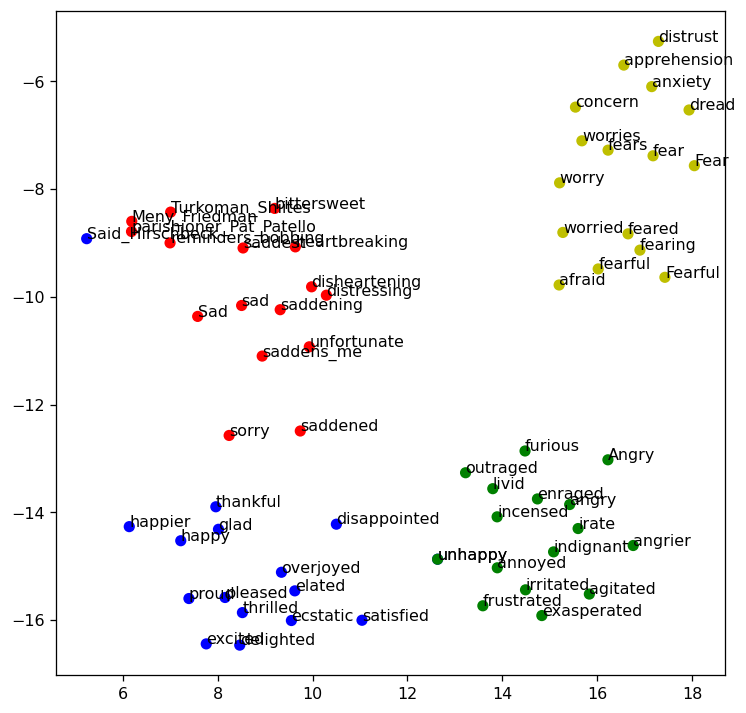

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part 2.

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

# Part 3.

# Data Preparation

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
import regex as re
from nltk.stem import WordNetLemmatizer
import nltk

In [73]:
import json

# Load the JSON file as lines
with open('tweets_DM.json', 'r') as file:
    lines = file.readlines()

# Remove trailing data or any additional content causing the issue
cleaned_lines = [line.strip() for line in lines if line.strip()]

# Join the cleaned lines back into a valid JSON string
cleaned_json = '[' + ','.join(cleaned_lines) + ']'

# Load the cleaned JSON string into a DataFrame
df = pd.read_json(cleaned_json)

In [74]:
import pandas as pd

first_row = df.iloc[0]
print(first_row)

_score                                                      391
_index                                           hashtag_tweets
_source       {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...
_crawldate                                  2015-05-23 11:42:47
_type                                                    tweets
Name: 0, dtype: object


In [75]:
import pandas as pd

# Assuming df is your DataFrame
first_row = df.iloc[0]

# Access the dictionary in the _source column directly
source_dict = first_row['_source']

# Iterate through the keys and values of the dictionary
for key, value in source_dict.items():
    print(f"Key: {key}, Value: {value}")

Key: tweet, Value: {'hashtags': ['Snapchat'], 'tweet_id': '0x376b20', 'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}


In [76]:
import pandas as pd
import json

# Assuming your DataFrame is named 'df'

# Use json_normalize to flatten the nested dictionary structure
df_normalized = pd.json_normalize(df['_source'])

# Concatenate the new columns to the original DataFrame
df = pd.concat([df, df_normalized], axis=1)

# Drop the original '_source' column if needed
# df = df.drop('_source', axis=1)

# Display the resulting DataFrame
print(df.head())

   _score          _index                                            _source  \
0     391  hashtag_tweets  {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...   
1     433  hashtag_tweets  {'tweet': {'hashtags': ['freepress', 'TrumpLeg...   
2     232  hashtag_tweets  {'tweet': {'hashtags': ['bibleverse'], 'tweet_...   
3     376  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...   
4     989  hashtag_tweets  {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...   

            _crawldate   _type                 tweet.hashtags tweet.tweet_id  \
0  2015-05-23 11:42:47  tweets                     [Snapchat]       0x376b20   
1  2016-01-28 04:52:09  tweets  [freepress, TrumpLegacy, CNN]       0x2d5350   
2  2017-12-25 04:39:20  tweets                   [bibleverse]       0x28b412   
3  2016-01-24 23:53:05  tweets                             []       0x1cd5b0   
4  2016-01-08 17:18:59  tweets                             []       0x2de201   

                                      

In [77]:
df

,_score,_index,_source,_crawldate,_type,tweet.hashtags,tweet.tweet_id,tweet.text
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [80]:
import pandas as pd

# 觀察提供emotion.csv以及_data_identification.csv，決定簡化名稱並重新命名 column
df.rename(columns={'tweet.tweet_id': 'tweet_id', 'tweet.text': 'text','_score':'score'}, inplace=True)

print(df)

         score          _index  \
0          391  hashtag_tweets   
1          433  hashtag_tweets   
2          232  hashtag_tweets   
3          376  hashtag_tweets   
4          989  hashtag_tweets   
...        ...             ...   
1867530    827  hashtag_tweets   
1867531    368  hashtag_tweets   
1867532    498  hashtag_tweets   
1867533    840  hashtag_tweets   
1867534    360  hashtag_tweets   

                                                   _source  \
0        {'tweet': {'hashtags': ['Snapchat'], 'tweet_id...   
1        {'tweet': {'hashtags': ['freepress', 'TrumpLeg...   
2        {'tweet': {'hashtags': ['bibleverse'], 'tweet_...   
3        {'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...   
4        {'tweet': {'hashtags': [], 'tweet_id': '0x2de2...   
...                                                    ...   
1867530  {'tweet': {'hashtags': ['mixedfeeling', 'butim...   
1867531  {'tweet': {'hashtags': [], 'tweet_id': '0x29d0...   
1867532  {'tweet': {'hashtags': [

In [81]:
df

,score,_index,_source,_crawldate,_type,tweet.hashtags,tweet_id,text
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [82]:
# 留下的column 為以下三個
#原因如下:  1.__index內資料值完全一致 2. _source已將source 內資料整理出獨立column 3. _crawldate 主觀認定時間與text結果無關 4. _type欄位內容完全一致
columns_to_keep = ["tweet_id", "score", "text"]
df = df[columns_to_keep]

# Display the DataFrame with selected columns
print(df)

         tweet_id  score                                               text
0        0x376b20    391  People who post "add me on #Snapchat" must be ...
1        0x2d5350    433  @brianklaas As we see, Trump is dangerous to #...
2        0x28b412    232  Confident of your obedience, I write to you, k...
3        0x1cd5b0    376                Now ISSA is stalking Tasha 😂😂😂 <LH>
4        0x2de201    989  "Trust is not the same as faith. A friend is s...
...           ...    ...                                                ...
1867530  0x316b80    827  When you buy the last 2 tickets remaining for ...
1867531  0x29d0cb    368  I swear all this hard work gone pay off one da...
1867532  0x2a6a4f    498  @Parcel2Go no card left when I wasn't in so I ...
1867533  0x24faed    840  Ah, corporate life, where you can date <LH> us...
1867534  0x34be8c    360             Blessed to be living #Sundayvibes <LH>

[1867535 rows x 3 columns]


In [83]:
import pandas as pd

#匯入兩資料集
emotion_df = pd.read_csv('emotion.csv')


data_identification_df = pd.read_csv('data_identification.csv')

# 查看兩資料級的名稱
print("Emotion DataFrame:")
print(emotion_df.head())

print("\nData Identification DataFrame:")
print(data_identification_df.head())

Emotion DataFrame:
   tweet_id       emotion
0  0x3140b1       sadness
1  0x368b73       disgust
2  0x296183  anticipation
3  0x2bd6e1           joy
4  0x2ee1dd  anticipation

Data Identification DataFrame:
   tweet_id identification
0  0x28cc61           test
1  0x29e452          train
2  0x2b3819          train
3  0x2db41f           test
4  0x2a2acc          train


In [85]:
data_identification_df

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train
...,...,...
1867530,0x227e25,train
1867531,0x293813,train
1867532,0x1e1a7e,train
1867533,0x2156a5,train


In [88]:
#將 data_identifiacation 依照 tweer_id 進行合併
merged_df = pd.merge(df, data_identification_df, on='tweet_id', how='inner')

print(merged_df)

         tweet_id  score                                               text  \
0        0x376b20    391  People who post "add me on #Snapchat" must be ...   
1        0x2d5350    433  @brianklaas As we see, Trump is dangerous to #...   
2        0x28b412    232  Confident of your obedience, I write to you, k...   
3        0x1cd5b0    376                Now ISSA is stalking Tasha 😂😂😂 <LH>   
4        0x2de201    989  "Trust is not the same as faith. A friend is s...   
...           ...    ...                                                ...   
1867530  0x316b80    827  When you buy the last 2 tickets remaining for ...   
1867531  0x29d0cb    368  I swear all this hard work gone pay off one da...   
1867532  0x2a6a4f    498  @Parcel2Go no card left when I wasn't in so I ...   
1867533  0x24faed    840  Ah, corporate life, where you can date <LH> us...   
1867534  0x34be8c    360             Blessed to be living #Sundayvibes <LH>   

        identification  
0                train  
1

In [92]:
#將 emotion 依照 tweer_id 進行合併
df_all = pd.merge(merged_df, emotion_df, on='tweet_id', how='inner')

df_all

,tweet_id,score,text,identification,emotion
0,0x376b20,391,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,0x2d5350,433,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,0x1cd5b0,376,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,0x1d755c,120,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,0x2c91a8,1021,Still waiting on those supplies Liscus. <LH>,train,anticipation
...,...,...,...,...,...
1455558,0x321566,94,I'm SO HAPPY!!! #NoWonder the name of this sho...,train,joy
1455559,0x38959e,627,In every circumtance I'd like to be thankful t...,train,joy
1455560,0x2cbca6,274,there's currently two girls walking around the...,train,joy
1455561,0x24faed,840,"Ah, corporate life, where you can date <LH> us...",train,joy


In [93]:
#將整理好 dataframe 儲存為 csv
path = r'C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\Homework\df_all.csv'
df_all1.to_csv(path, index=False)

# Data Preprocessing

前處理部分主要針對 "text" 欄位進行處理，首先先將在"text" 中無意義字移除，無意義包括標點符號、特殊字元 (@)以及在stopword中有被列舉的字。後將此欄位進行 lemmatize 將字回歸原始型態，也讓各欄位字元有一致性。最後採用不同 NLP 手法進行嘗試。1. Word2Vec 使用google pre train model，也使用 average pooling將 word vectors轉換成 sentence vector 2. TFIDF 分別使用前17000、20000以及23000重要的 max feature 來建構 tfidf，可以發現 20000的表現最好，於是最終選用。

In [94]:
#讀取資料
df=pd.read_csv(r'C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\Homework\df_all.csv')


In [95]:
#移除標點符號、stopwords and 將字變回原形
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Load your dataframe (assuming it's named df)
# df = pd.read_csv('your_file.csv')

# Function to remove punctuation and stopwords
def preprocess_text(text):
    # Remove <LH> and @
    text = text.replace('<LH>', '').replace('@', '')

    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_text = [word for word in tokens if word.lower() not in stop_words]

    return ' '.join(filtered_text)

# Apply the preprocessing function to the 'text' column
df['text'] = df['text'].apply(preprocess_text)

# Display the updated dataframe
print(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Leanlab908-4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leanlab908-4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


   Unnamed: 0  tweet_id                                               text  \
0           0  0x376b20  People post add Snapchat must dehydrated Cuz m...   
1           1  0x2d5350  brianklaas see Trump dangerous freepress aroun...   
2           2  0x28b412  Confident obedience write knowing even ask Phi...   
3           3  0x1cd5b0                            ISSA stalking Tasha 😂😂😂   
4           4  0x2de201  Trust faith friend someone trust Putting faith...   

   score identification       emotion  
0    391          train  anticipation  
1    433          train       sadness  
2    232           test           NaN  
3    376          train          fear  
4    989           test           NaN  


In [96]:
#查看移除完無意義字元是否有NA值需要處理
na_count = df.isna().sum()

# Print the result
print(na_count)

Unnamed: 0             0
tweet_id               0
text                   0
score                  0
identification         0
emotion           411972
dtype: int64


In [97]:
#字回歸原始型態
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')



#  lemmatize a sentence
def lemmatize_sentence(sentence):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(sentence)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply lemmatization to the 'sentence' column
df['lemmatized_sentence'] = df['text'].apply(lemmatize_sentence)

# Display the DataFrame
print(df)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Leanlab908-4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Leanlab908-4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


         Unnamed: 0  tweet_id  \
0                 0  0x376b20   
1                 1  0x2d5350   
2                 2  0x28b412   
3                 3  0x1cd5b0   
4                 4  0x2de201   
...             ...       ...   
1867530     1867530  0x316b80   
1867531     1867531  0x29d0cb   
1867532     1867532  0x2a6a4f   
1867533     1867533  0x24faed   
1867534     1867534  0x34be8c   

                                                      text  score  \
0        People post add Snapchat must dehydrated Cuz m...    391   
1        brianklaas see Trump dangerous freepress aroun...    433   
2        Confident obedience write knowing even ask Phi...    232   
3                                  ISSA stalking Tasha 😂😂😂    376   
4        Trust faith friend someone trust Putting faith...    989   
...                                                    ...    ...   
1867530  buy last 2 tickets remaining show sell mixedfe...    827   
1867531                swear hard work gone pay one

In [98]:
# Save
df.to_csv(r'C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\Homework\df_lemmatize1.csv')

In [99]:
#將資料依據identification切分為訓練及與測試集

df_train = df[df['identification']=='train']
df_test = df[df['identification']=='test']

In [ ]:
#Word2Vec 使用google pre train model，也使用 average pooling將 word vectors轉換成 sentence vector 
#from gensim.models import KeyedVectors
#import pandas as pd
#model_path = r"C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\GoogleNews-vectors-negative300.bin.gz"
#w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
#print('Model loaded successfully')

In [ ]:
# 化成sentence vector
#def get_vector(tokens):
#    vector = []
#    for word in tokens:
#        if word in w2v_google_model:
#            vector.append(w2v_google_model[word])

#    if not vector:
#        return np.zeros(w2v_google_model.vector_size)
    
#    return np.mean(vector, axis=0)

# Apply the get_vector function to each row in the training and testing data
#X_train = df_train['text'].apply(lambda x: get_vector(x) if isinstance(x, list) else []).tolist()
#X_test = df_test['text'].apply(lambda x: get_vector(x) if isinstance(x, list) else []).tolist()

# Convert the lists of vectors to numpy arrays
#X_train = np.vstack(X_train)
#X_test = np.vstack(X_test)

# Labels for training and testing
#y_train = df_train['emotion']
#y_test = df_test['emotion']

In [100]:
# TFIDF 分別使用前17000、20000以及23000重要的 max feature 來建構 tfidf，可以發現 20000的表現最好，於是最終選用。
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
vectorizer_2 = TfidfVectorizer(max_features=20000,tokenizer=nltk.word_tokenize)
tf_idf_all_2 = vectorizer_2.fit(df['lemmatized_sentence'])

In [101]:
# 因使用機器學習的方式進行classification預測，需分別對訓練集與測試集做同樣的前處理
X_train = tf_idf_all_2.transform(df_train['lemmatized_sentence'])
y_train = df_train['emotion']

X_test = tf_idf_all_2.transform(df_test['lemmatized_sentence'])
y_test = df_test['emotion']

#查看 shape 有沒有錯
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (1455563, 20000)
y_train.shape:  (1455563,)
X_test.shape:  (411972, 20000)
y_test.shape:  (411972,)


# 模型選擇

模型方面嘗試 catboost、SVC、decision tree 跟 LGBM。其中以 LGBM 訓練時間以及訓練表現較佳，於是採用 LGBM 作為最終 classifier 模型

In [ ]:
#Catboost
#from catboost import CatBoostClassifier

# Build CatBoost model
#catboost_model = CatBoostClassifier(random_state=0)

# Training
#catboost_model.fit(X_train, y_train)

# Predictions
#y_train_pred_catboost = catboost_model.predict(X_train)
#y_test_pred_catboost = catboost_model.predict(X_test)

# Display predictions
#print("CatBoost predictions on the test set:", y_test_pred_catboost[:10])

In [102]:
#LGBM
from lightgbm import LGBMClassifier

# Build LGBM model
LGBM_model = LGBMClassifier(random_state=0)

# Training
LGBM_model.fit(X_train, y_train)

# Predictions
y_train_pred = LGBM_model.predict(X_train)
y_test_pred = LGBM_model.predict(X_test)

# Display the first 10 predictions
print(y_test_pred[:10])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 51.346935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 353255
[LightGBM] [Info] Number of data points in the train set: 1455563, number of used features: 19861
[LightGBM] [Info] Start training from score -3.597599
[LightGBM] [Info] Start training from score -1.765956
[LightGBM] [Info] Start training from score -2.347948
[LightGBM] [Info] Start training from score -3.124281
[LightGBM] [Info] Start training from score -1.037008
[LightGBM] [Info] Start training from score -2.018196
[LightGBM] [Info] Start training from score -3.396874
[LightGBM] [Info] Start training from score -1.957809
['joy' 'anticipation' 'joy' 'anticipation' 'trust' 'joy' 'joy' 'joy' 'joy'
 'joy']


In [ ]:
#DecisionTree
#DT_model = DecisionTreeClassifier(random_state=1)

## training!
#DT_model = DT_model.fit(X_train, y_train)

## predict!
#y_train_pred = DT_model.predict(X_train)
#y_test_pred = DT_model.predict(X_test)

## so we get the pred result
#y_test_pred[:10]

In [ ]:
#SVC

#from sklearn.svm import SVC

# Build SVM model
#SVM_model = SVC(random_state=0)

# Training
#SVM_model.fit(X_train, y_train)

# Predictions
#y_train_pred_svm = SVM_model.predict(X_train)
#y_test_pred_svm = SVM_model.predict(X_test)

# Display the first 10 predictions
#print(y_test_pred_svm[:10])

In [103]:
df_test

,Unnamed: 0,tweet_id,text,score,identification,emotion,lemmatized_sentence
2,2,0x28b412,Confident obedience write knowing even ask Phi...,232,test,NaN,Confident obedience write knowing even ask Phi...
4,4,0x2de201,Trust faith friend someone trust Putting faith...,989,test,NaN,Trust faith friend someone trust Putting faith...
9,9,0x218443,enough satisfied goal really money materialism...,66,test,NaN,enough satisfied goal really money materialism...
30,30,0x2939d5,God woke chase day GodsPlan GodsWork,104,test,NaN,God woke chase day GodsPlan GodsWork
33,33,0x26289a,tough times turn symbol hope,310,test,NaN,tough time turn symbol hope
...,...,...,...,...,...,...,...
1867525,1867525,0x2913b4,message ye heard beginning love one another Jo...,602,test,NaN,message ye heard beginning love one another Jo...
1867529,1867529,0x2a980e,lad hath five barley loaves two small fishes a...,598,test,NaN,lad hath five barley loaf two small fish among...
1867530,1867530,0x316b80,buy last 2 tickets remaining show sell mixedfe...,827,test,NaN,buy last 2 ticket remaining show sell mixedfee...
1867531,1867531,0x29d0cb,swear hard work gone pay one day😈💰💸,368,test,NaN,swear hard work gone pay one day😈💰💸


# Submission CSV

In [2]:
y_test_pred=pd.DataFrame(y_test_pred)
submittion=df_test.copy()
submittion['emotion']=list(y_test_pred[0])
submittion.drop(labels=['text','score','identification','lemmatized_sentence','Unnamed: 0'],axis=1,inplace=True)
submittion.rename(columns={"tweet_id": "id"},inplace=True)
submittion

NameError: name 'pd' is not defined

In [105]:
submittion.to_csv(r'C:\Users\Leanlab908-4\OneDrive - NTHU\桌面\DMLab2\DM2023-Lab2-Master\Homework\lgbm4.csv',index=False)